<a href="https://colab.research.google.com/github/sammyhasan17/fraud-detection-using-ML/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## As we wait for Plaid API to give us real world data, we will start with a pre-cleaned dataset from the Kaggle API

## Let's Load our data and use Pandas to take a look

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sammyhasan17
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset


100%|██████████| 145M/145M [00:00<00:00, 981MB/s] 

In [ ]:
import pandas as pd

df = pd.read_csv('/content/credit-card-transactions-dataset/credit_card_transactions.csv')

In [ ]:
# Getting familiar with our data
print("First 5 rows of the dataset:")
display(df.head())

print("\nNumber of rows in the dataset:")
print(f"{df.shape[0]:,}")

First 5 rows of the dataset:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0



Number of rows in the dataset:
1,296,675


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

## Let's Clean our Data

In [ ]:
# Data clean up -> NaN into 0 for our missing zip code of where transaction took place
df['merch_zipcode'] = df['merch_zipcode'].fillna(0)


In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


## Let's get some clues about the fraud in our data

In [ ]:
# make sure our is_fraud integer is only 1 or 0
print(df['is_fraud'].unique())

[0 1]


In [ ]:
fraud_df = df[df['is_fraud'] == 1]
print(fraud_df.head(10))  # show only top 10 fraud cases


      Unnamed: 0 trans_date_trans_time           cc_num  \
2449        2449   2019-01-02 01:06:37    4613314721966   
2472        2472   2019-01-02 01:47:29  340187018810220   
2523        2523   2019-01-02 03:05:23  340187018810220   
2546        2546   2019-01-02 03:38:03    4613314721966   
2553        2553   2019-01-02 03:55:47  340187018810220   
2937        2937   2019-01-02 13:38:08    4613314721966   
3527        3527   2019-01-02 23:52:08    4613314721966   
3580        3580   2019-01-03 01:05:27  340187018810220   
3600        3600   2019-01-03 01:35:52  340187018810220   
3671        3671   2019-01-03 03:17:36  340187018810220   

                              merchant       category     amt  first    last  \
2449            fraud_Rutherford-Mertz    grocery_pos  281.06  Jason  Murphy   
2472  fraud_Jenkins, Hauck and Friesen  gas_transport   11.52  Misty    Hart   
2523            fraud_Goodwin-Nitzsche    grocery_pos  276.31  Misty    Hart   
2546            fraud_Erdman-K

In [ ]:
cols = ['trans_date_trans_time', 'merchant', 'category', 'amt', 'first', 'last', 'city']
print(fraud_df[cols].head(10).to_string(index=False))

trans_date_trans_time                         merchant      category    amt first   last          city
  2019-01-02 01:06:37           fraud_Rutherford-Mertz   grocery_pos 281.06 Jason Murphy Collettsville
  2019-01-02 01:47:29 fraud_Jenkins, Hauck and Friesen gas_transport  11.52 Misty   Hart   San Antonio
  2019-01-02 03:05:23           fraud_Goodwin-Nitzsche   grocery_pos 276.31 Misty   Hart   San Antonio
  2019-01-02 03:38:03           fraud_Erdman-Kertzmann gas_transport   7.03 Jason Murphy Collettsville
  2019-01-02 03:55:47               fraud_Koepp-Parker   grocery_pos 275.73 Misty   Hart   San Antonio
  2019-01-02 13:38:08               fraud_Medhurst PLC  shopping_net 844.80 Jason Murphy Collettsville
  2019-01-02 23:52:08              fraud_Ruecker Group      misc_net 843.91 Jason Murphy Collettsville
  2019-01-03 01:05:27         fraud_Conroy-Cruickshank gas_transport  10.76 Misty   Hart   San Antonio
  2019-01-03 01:35:52               fraud_Koepp-Parker   grocery_pos 332.

In [ ]:
# ratio of fraud
fraud_ratio = df['is_fraud'].value_counts(normalize=True) * 100
print(fraud_ratio.round(2).astype(str) + '%')

is_fraud
0    99.42%
1     0.58%
Name: proportion, dtype: object


In [ ]:
total_amt = df['amt'].sum()
print(f"Total transaction amount (including fraud): ${total_amt:,.2f}")

Total transaction amount (including fraud): $91,222,428.90


In [ ]:
total_true_amt = df[df['is_fraud'] == 0]['amt'].sum()
print(f"Total valid amount: ${total_true_amt:,.2f}")

Total true amount: $87,234,340.29


In [ ]:
# How much is the total amount of fraud in dollars?
total_fraud_amt = fraud_df['amt'].sum()
print(f"Total fraud amount: ${total_fraud_amt:,.2f}")

Total fraud amount: $3,988,088.61


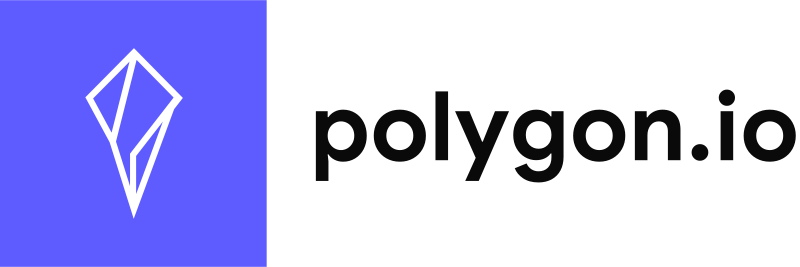

# Part 2: Using the Polygon API